In [7]:
print('Setting UP')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.model_selection import train_test_split
from utlis import *

Setting UP


Total Images Imported 2212
                      Center  Steering
0  IMG0\Image_1698494764.jpg       0.0
1  IMG0\Image_1698494764.jpg       0.0
2  IMG0\Image_1698494765.jpg       0.0
3  IMG0\Image_1698494765.jpg       0.0
4  IMG0\Image_1698494766.jpg       0.0


c:\Users\SARTHAK AMBLE\Desktop\Project\utlis.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(log_data, ignore_index=True)
c:\Users\SARTHAK AMBLE\Desktop\Project\utlis.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(log_data, ignore_index=True)


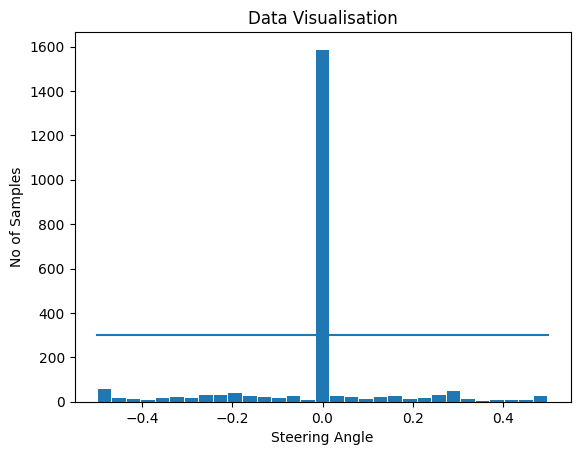

Removed Images: 1286
Remaining Images: 926


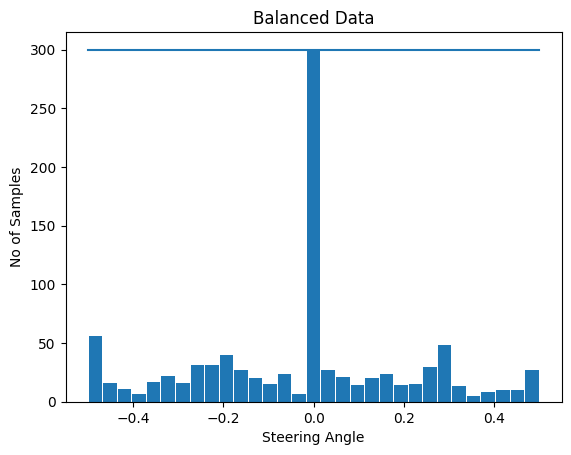

In [8]:
path = 'DataCollected'
# Import and inspect data
data = importDataInfo(path)
print(data.head())
data = balanceData(data, display=True)

In [9]:
# Load and prepare data for processing
imagesPath, steerings = loadData(path, data)

In [10]:
# Split the data into training and validation sets
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings, test_size=0.2, random_state=10)
print('Total Training Images: ', len(xTrain))
print('Total Validation Images: ', len(xVal))


Total Training Images:  740
Total Validation Images:  186


In [11]:
# Create and compile the model
model = createModel()

In [12]:
# Train the model
history = model.fit(dataGen(xTrain, yTrain, 100, 1),
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=dataGen(xVal, yVal, 50, 0),
                    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 43s 428ms/step - loss: 0.2628 - val_loss: 0.0636
Epoch 2/10
100/100 [==============================] - 60s 607ms/step - loss: 0.0563 - val_loss: 0.0619
Epoch 3/10
100/100 [==============================] - 62s 624ms/step - loss: 0.0548 - val_loss: 0.0641
Epoch 4/10
100/100 [==============================] - 77s 771ms/step - loss: 0.0558 - val_loss: 0.0701
Epoch 5/10
100/100 [==============================] - 49s 495ms/step - loss: 0.0549 - val_loss: 0.0598
Epoch 6/10
100/100 [==============================] - 42s 424ms/step - loss: 0.0529 - val_loss: 0.0619
Epoch 7/10
100/100 [==============================] - 44s 438ms/step - loss: 0.0547 - val_loss: 0.0588
Epoch 8/10
100/100 [==============================] - 64s 646ms/step - loss: 0.0555 - val_loss: 0.0575
Epoch 9/10
100/100 [==============================] - 42s 419ms/step - loss: 0.0538 - val_loss: 0.0599
Epoch 10/10
100/100 [==============================] - 42s 423ms/step - l

In [13]:
# Save the trained model
#model.save('model_combined1.h5')
print('Model Saved')

Model Saved


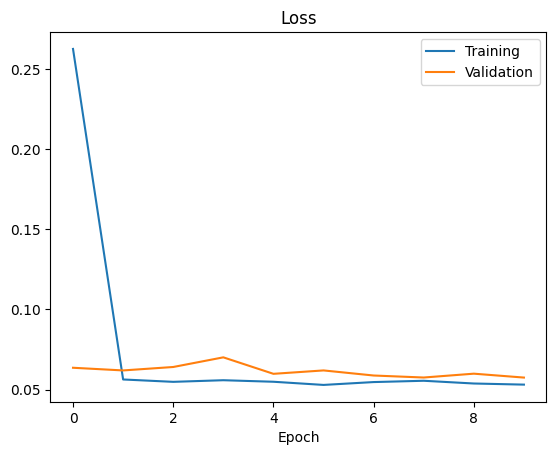

In [14]:
# Plot the training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()